In [1]:
task_name = 'task1_sandwich_openface'

In [2]:
model_path = './models/{0}/'.format(task_name)

# Model Creation for Tasks captured through Openface

1. First we create the training data from the task participant data

       This results in three intermediate training CSVs stored to disk.

2. Next we train the PCA models

        This results in pickled PCA models.
        
3. Then we train a k-means cluster that sits on top of PCA 

        This results in pickled k-means model.

4. Next we train an autoencoder model (as replacement for PCA)

        This results in saved autoencoder model.


In [3]:
import os
import numpy as np
import pandas as pd

import warnings
from tqdm import tqdm_notebook as tqdm

path = './data/openface/{0}'.format(task_name)

files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path,f))]
print('Num Files:',len(files))

Num Files: 32


## Create training set
Using k out of every file?

Note dropping bad lines

In [4]:
from sklearn.model_selection import train_test_split

indicies = ['frame'] + ['x_{0}'.format(i) for i in range(0,68)] + ['y_{0}'.format(i) for i in range(0,68)]

flag = True
Train = None
Test = None
Valid = None

for f in tqdm(list(files)):
    
    # Load CSV
    print(f)
    df = pd.read_csv(
            os.path.join(path,f), 
            error_bad_lines=False, 
            warn_bad_lines=True)
    
    face_lmk = df[indicies]
    
    # Filter NaN rows
    nans = df[df[indicies].isnull().any(axis=1)]
    if not nans.empty:
        dropList = nans.index.tolist()
        for r in dropList:
            warnings.warn('Dropping row due to NaN, {0}'.format(r))
        face_lmk.drop(dropList, inplace=True)
        
    face_lmk.insert(0,'filename',[f for i in range(0,face_lmk.shape[0])],True)
        
    print('Full:',face_lmk.shape)
    
    # Create Training, Test, Validation subsets
    train, tmp = train_test_split(face_lmk, test_size=0.33)
    test, val = train_test_split(tmp, test_size=0.5)
    print('Train:',train.shape,'Test:',test.shape,'Validation',val.shape)
    
    if flag:
        flag = False
        Train = train
        Test = test
        Valid = val
    else:
        Train = Train.append(train)
        Test = Test.append(test)
        Valid = Valid.append(val)

# Final Dataset (shuffled)
Train = Train.sample(frac=1).reset_index(drop=True)
Test = Test.sample(frac=1).reset_index(drop=True)
Valid = Valid.sample(frac=1).reset_index(drop=True)

print('\n\nFINAL')
print('Train:',Train.shape,'Test:',Test.shape,'Validation',Valid.shape)

0101_sandwich_cut.csv
Full: (5732, 138)
Train: (3840, 138) Test: (946, 138) Validation (946, 138)
0102_sandwich_cut.csv
Full: (5692, 138)
Train: (3813, 138) Test: (939, 138) Validation (940, 138)
0201_sandwich_cut.csv
Full: (9953, 138)
Train: (6668, 138) Test: (1642, 138) Validation (1643, 138)
0301_sandwich_cut.csv
Full: (8261, 138)
Train: (5534, 138) Test: (1363, 138) Validation (1364, 138)
0302_sandwich_cut.csv
Full: (8333, 138)
Train: (5583, 138) Test: (1375, 138) Validation (1375, 138)
0402_sandwich_cut.csv
Full: (4974, 138)
Train: (3332, 138) Test: (821, 138) Validation (821, 138)
0501_sandwich_cut.csv
Full: (9426, 138)
Train: (6315, 138) Test: (1555, 138) Validation (1556, 138)
0502_sandwich_cut.csv
Full: (9457, 138)
Train: (6336, 138) Test: (1560, 138) Validation (1561, 138)
0601_sandwich_cut.csv
Full: (11538, 138)
Train: (7730, 138) Test: (1904, 138) Validation (1904, 138)
0602_sandwich_cut.csv
Full: (10711, 138)
Train: (7176, 138) Test: (1767, 138) Validation (1768, 138)
0701

b'Skipping line 4053: expected 714 fields, saw 1233\nSkipping line 4064: expected 714 fields, saw 722\n'
C:\Users\curth\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Dropping row due to NaN, 6548
C:\Users\curth\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Dropping row due to NaN, 6552
C:\Users\curth\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Full: (6570, 138)
Train: (4401, 138) Test: (1084, 138) Validation (1085, 138)
1401_sandwich_cut.csv
Full: (7476, 138)
Train: (5008, 138) Test: (1234, 138) Validation (1234, 138)
1402_sandwich_cut.csv
Full: (7518, 138)
Train: (5037, 138) Test: (1240, 138) Validation (1241, 138)
1501_sandwich_cut.csv
Full: (7224, 138)
Train: (4840, 138) Test: (1192, 138) Validation (1192, 138)
1502_sandwich_cut.csv
Full: (7219, 138)
Train: (4836, 138) Test: (1191, 138) Validation (1192, 138)
1701_Sandwich_Cut.csv
Full: (6185, 138)
Train: (4143, 138) Test: (1021, 138) Validation (1021, 138)
1702_Sandwich_Cut.csv
Full: (6674, 138)
Train: (4471, 138) Test: (1101, 138) Validation (1102, 138)
sona0101_sandwich_cut.csv
Full: (4700, 138)
Train: (3149, 138) Test: (775, 138) Validation (776, 138)
sona0102_sandwich_cut.csv
Full: (4735, 138)
Train: (3172, 138) Test: (781, 138) Validation (782, 138)
Sona0201_sandwich_cut.csv
Full: (6358, 138)
Train: (4259, 138) Test: (1049, 138) Validation (1050, 138)
Sona0202_sandw

In [5]:
Train.head()

,filename,frame,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67
0,Sona0302_sandwich_cut.csv,446.0,790.0,785.4,788.3,797.6,807.7,820.0,832.2,846.9,...,718.8,710.7,701.3,702.3,705.5,705.8,706.1,709.3,707.8,703.1
1,0101_sandwich_cut.csv,4962.0,676.6,673.3,676.0,685.4,696.5,705.9,713.5,720.4,...,405.3,402.8,394.8,392.6,392.7,391.9,389.1,394.3,394.2,393.4
2,0801_sandwich_cut.csv,6745.0,590.8,600.4,614.1,630.9,650.1,674.7,698.7,724.8,...,628.6,625.7,613.1,605.2,602.7,596.7,586.5,599.9,606.4,609.2
3,Sona0302_sandwich_cut.csv,5357.0,818.2,813.2,813.3,820.6,832.0,846.6,860.1,878.3,...,723.1,716.6,707.3,705.6,708.1,708.5,709.4,711.8,710.1,706.1
4,0302_sandwich_cut.csv,7037.0,727.8,730.1,735.0,744.0,754.1,766.7,777.8,792.2,...,713.9,708.2,698.4,701.4,702.2,700.8,694.6,701.1,702.5,701.7


In [6]:
Test.head()

,filename,frame,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67
0,0601_sandwich_cut.csv,271.0,745.2,749.9,764.8,785.8,807.2,836.0,863.3,895.1,...,792.7,780.4,760.7,757.5,760.8,760.7,759.9,763.7,763.4,759.9
1,Sona0302_sandwich_cut.csv,2960.0,866.9,861.7,861.9,866.5,872.6,883.4,892.2,905.9,...,693.7,684.0,671.5,673.5,678.6,681.3,686.8,683.3,680.1,674.4
2,1101_sandwich_cut.csv,5587.0,710.2,732.0,756.1,779.8,808.6,843.7,882.5,924.8,...,904.7,908.9,896.3,882.6,878.2,868.6,866.4,874.1,884.2,888.9
3,1101_sandwich_cut.csv,540.0,871.2,875.1,889.4,910.8,939.8,971.0,1003.3,1034.9,...,855.9,847.5,824.6,823.3,822.3,819.6,810.8,829.5,831.2,831.1
4,0301_sandwich_cut.csv,1234.0,728.5,734.5,746.7,758.5,760.2,751.8,737.3,720.6,...,997.6,988.4,974.1,978.7,983.2,984.2,988.1,987.8,986.8,982.2


In [7]:
Valid.head()

,filename,frame,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,y_58,y_59,y_60,y_61,y_62,y_63,y_64,y_65,y_66,y_67
0,1401_sandwich_cut.csv,3066.0,728.1,738.8,754.4,774.4,793.6,815.0,833.7,853.1,...,623.6,620.4,611.8,610.3,609.4,606.1,591.6,608.0,611.4,612.1
1,sona0101_sandwich_cut.csv,603.0,771.1,773.5,778.2,786.2,802.8,829.9,857.0,887.8,...,727.3,714.9,693.5,704.4,708.1,706.2,698.6,707.0,708.9,705.7
2,0901_sandwich_cut.csv,3577.0,332.2,327.5,333.1,352.4,376.3,412.6,456.3,503.4,...,866.2,856.8,835.3,841.4,845.2,846.5,839.0,849.7,848.0,844.1
3,1402_sandwich_cut.csv,6286.0,848.2,850.1,854.9,862.2,870.9,881.4,891.6,903.0,...,459.7,454.9,444.5,447.0,447.8,445.6,439.3,446.5,448.5,447.8
4,0201_sandwich_cut.csv,2635.0,1016.2,1019.0,1024.1,1030.9,1041.1,1057.2,1075.7,1098.2,...,394.5,390.8,380.3,382.0,383.2,382.3,380.7,382.0,383.5,382.4


Saving to disk

In [8]:
save_path = './data/tmp_analysis/{0}'.format(task_name)
save_train_path = save_path + '_train.csv'
save_test_path = save_path + '_test.csv'
save_valid_path = save_path + '_valid.csv'


Train.to_csv(save_train_path)
Test.to_csv(save_test_path)
Valid.to_csv(save_valid_path)

## PCA Fit
I found 32 components to be roughly the inflection curve.
I am also creating an 18  component variant just in case we want a direct comparison with action units

In [9]:
import pickle
from sklearn.decomposition import PCA

In [10]:
save_path = './data/tmp_analysis/{0}'.format(task_name)
save_train_path = save_path + '_train.csv'
save_test_path = save_path + '_test.csv'
save_valid_path = save_path + '_valid.csv'


Train = pd.read_csv(save_train_path)
Test = pd.read_csv(save_test_path)
Valid = pd.read_csv(save_valid_path)

In [11]:
X = Train.to_numpy()[:,3:]

In [12]:
pca_n_32 = PCA(n_components=32)
face_pca_n_32 = pca_n_32.fit(X)

print(face_pca_n_32.explained_variance_)

[3.13716362e+06 1.15707806e+06 6.28820827e+04 2.86924022e+04
 1.33428137e+04 7.51765107e+03 4.51031746e+03 1.88007897e+03
 1.26596297e+03 8.32617089e+02 6.71750219e+02 5.48990323e+02
 4.53613797e+02 3.26996264e+02 2.96211621e+02 2.51674654e+02
 1.86077785e+02 1.60660862e+02 1.33889604e+02 1.11112003e+02
 9.91051455e+01 8.23253765e+01 7.77203918e+01 7.13525794e+01
 5.45803767e+01 4.91155499e+01 4.54319876e+01 3.89493847e+01
 3.13900346e+01 2.77706231e+01 2.51852337e+01 2.01691516e+01]


In [13]:
pickle.dump(face_pca_n_32,open(model_path+'pca_n_32.p','wb'))

In [14]:
pca_n_5 = PCA(n_components=5)
face_pca_n_5 = pca_n_5.fit(X)

print(face_pca_n_5.explained_variance_)

[3137163.62342288 1157078.05718031   62882.08273717   28692.40220822
   13342.81367864]


In [15]:
pickle.dump(face_pca_n_5,open(model_path+'pca_n_5.p','wb'))

# Autoencoder


32 Wide encoder

In [47]:
import keras
from keras import layers

import matplotlib.pyplot as plt

In [17]:
X = Train.to_numpy()[:,3:]
Xtest = Test.to_numpy()[:,3:]
Xvalid = Valid.to_numpy()[:,3:]

In [18]:
print(X.shape)

(169807, 136)


In [19]:
input_dim = X.shape[1]
encoding_dim = 32

input_layer = keras.Input(shape=(input_dim,))
encoded_layer = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded_layer = layers.Dense(input_dim, activation='relu')(encoded_layer)

autoencoder_32 = keras.Model(input_layer,decoded_layer)

encoder_32 = keras.Model(input_layer, encoded_layer)

In [20]:
autoencoder_32.compile(optimizer='adam',
                    loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
autoencoder_32.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 136)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4384      
_________________________________________________________________
dense_2 (Dense)              (None, 136)               4488      
Total params: 8,872
Trainable params: 8,872
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = autoencoder_32.fit(X, X, epochs=4, batch_size=64, verbose=1, validation_data=(Xtest, Xtest))




Train on 169807 samples, validate on 41820 samples
Epoch 1/4







 73664/169807 [============>.................] - ETA: 23:23 - loss: -907.310 - ETA: 6:24 - loss: -1119.302 - ETA: 3:31 - loss: -1263.605 - ETA: 2:33 - loss: -1447.230 - ETA: 2:04 - loss: -1646.020 - ETA: 1:46 - loss: -1832.046 - ETA: 1:34 - loss: -1981.589 - ETA: 1:25 - loss: -2120.452 - ETA: 1:19 - loss: -2270.677 - ETA: 1:14 - loss: -2387.013 - ETA: 1:10 - loss: -2490.874 - ETA: 1:07 - loss: -2587.152 - ETA: 1:05 - loss: -2683.581 - ETA: 1:02 - loss: -2768.844 - ETA: 1:00 - loss: -2842.418 - ETA: 59s - loss: -2915.557 - ETA: 57s - loss: -2978.45 - ETA: 56s - loss: -3040.89 - ETA: 55s - loss: -3096.00 - ETA: 54s - loss: -3145.15 - ETA: 53s - loss: -3189.99 - ETA: 52s - loss: -3227.45 - ETA: 51s - loss: -3262.04 - ETA: 50s - loss: -3295.31 - ETA: 50s - loss: -3326.37 - ETA: 49s - loss: -3353.59 - ETA: 49s - loss: -3377.19 - ETA: 48s - loss: -3400.99 - ETA: 48s - loss: -3421.99 - ETA: 47s - loss: -3443.95 - ETA: 47s - loss: -3462.60 - ETA: 46s - loss: -3483.71 - ETA: 46s - loss: -3501.5

147456/169807 [=========================>....] - ETA: 22s - loss: -4995.59 - ETA: 22s - loss: -4997.28 - ETA: 22s - loss: -4998.41 - ETA: 21s - loss: -4999.68 - ETA: 21s - loss: -5000.73 - ETA: 21s - loss: -5002.14 - ETA: 21s - loss: -5003.37 - ETA: 21s - loss: -5004.84 - ETA: 21s - loss: -5005.80 - ETA: 21s - loss: -5007.11 - ETA: 21s - loss: -5008.08 - ETA: 21s - loss: -5009.22 - ETA: 21s - loss: -5010.50 - ETA: 21s - loss: -5011.52 - ETA: 21s - loss: -5012.68 - ETA: 21s - loss: -5013.99 - ETA: 21s - loss: -5015.26 - ETA: 21s - loss: -5016.70 - ETA: 21s - loss: -5018.20 - ETA: 20s - loss: -5019.28 - ETA: 20s - loss: -5020.26 - ETA: 20s - loss: -5021.70 - ETA: 20s - loss: -5022.91 - ETA: 20s - loss: -5023.84 - ETA: 20s - loss: -5025.20 - ETA: 20s - loss: -5026.30 - ETA: 20s - loss: -5027.45 - ETA: 20s - loss: -5028.46 - ETA: 20s - loss: -5029.46 - ETA: 20s - loss: -5030.46 - ETA: 20s - loss: -5031.42 - ETA: 20s - loss: -5032.83 - ETA: 20s - loss: -5033.87 - ETA: 20s - loss: -5035.02 -

169807/169807 [==============================] - ETA: 5s - loss: -5193.589 - ETA: 4s - loss: -5193.963 - ETA: 4s - loss: -5194.340 - ETA: 4s - loss: -5194.799 - ETA: 4s - loss: -5195.460 - ETA: 4s - loss: -5195.913 - ETA: 4s - loss: -5196.384 - ETA: 4s - loss: -5197.017 - ETA: 4s - loss: -5197.610 - ETA: 4s - loss: -5198.029 - ETA: 4s - loss: -5198.473 - ETA: 4s - loss: -5199.045 - ETA: 4s - loss: -5199.496 - ETA: 4s - loss: -5200.117 - ETA: 4s - loss: -5200.669 - ETA: 4s - loss: -5201.174 - ETA: 4s - loss: -5201.827 - ETA: 3s - loss: -5202.574 - ETA: 3s - loss: -5203.197 - ETA: 3s - loss: -5203.913 - ETA: 3s - loss: -5204.532 - ETA: 3s - loss: -5205.116 - ETA: 3s - loss: -5205.703 - ETA: 3s - loss: -5206.449 - ETA: 3s - loss: -5207.037 - ETA: 3s - loss: -5207.807 - ETA: 3s - loss: -5208.536 - ETA: 3s - loss: -5209.176 - ETA: 3s - loss: -5209.726 - ETA: 3s - loss: -5210.308 - ETA: 3s - loss: -5210.993 - ETA: 3s - loss: -5211.567 - ETA: 3s - loss: -5212.143 - ETA: 3s - loss: -5212.699 -

 74304/169807 [============>.................] - ETA: 1:07 - loss: -5552.142 - ETA: 42s - loss: -5536.557 - ETA: 38s - loss: -5579.89 - ETA: 37s - loss: -5581.55 - ETA: 37s - loss: -5573.17 - ETA: 37s - loss: -5581.64 - ETA: 37s - loss: -5591.95 - ETA: 36s - loss: -5582.16 - ETA: 36s - loss: -5591.89 - ETA: 36s - loss: -5595.08 - ETA: 36s - loss: -5597.17 - ETA: 36s - loss: -5599.15 - ETA: 36s - loss: -5604.64 - ETA: 36s - loss: -5603.80 - ETA: 36s - loss: -5611.58 - ETA: 35s - loss: -5616.17 - ETA: 35s - loss: -5615.58 - ETA: 35s - loss: -5615.53 - ETA: 35s - loss: -5618.06 - ETA: 35s - loss: -5616.41 - ETA: 35s - loss: -5618.25 - ETA: 35s - loss: -5615.13 - ETA: 35s - loss: -5615.36 - ETA: 35s - loss: -5612.41 - ETA: 35s - loss: -5610.67 - ETA: 35s - loss: -5611.72 - ETA: 35s - loss: -5612.59 - ETA: 35s - loss: -5614.16 - ETA: 34s - loss: -5616.00 - ETA: 34s - loss: -5613.83 - ETA: 34s - loss: -5613.11 - ETA: 34s - loss: -5612.48 - ETA: 34s - loss: -5610.86 - ETA: 34s - loss: -5611.7

148672/169807 [=========================>....] - ETA: 20s - loss: -5603.81 - ETA: 20s - loss: -5603.76 - ETA: 20s - loss: -5603.64 - ETA: 20s - loss: -5603.58 - ETA: 20s - loss: -5603.59 - ETA: 20s - loss: -5603.20 - ETA: 20s - loss: -5603.32 - ETA: 20s - loss: -5603.68 - ETA: 20s - loss: -5603.97 - ETA: 20s - loss: -5603.95 - ETA: 20s - loss: -5604.06 - ETA: 20s - loss: -5604.13 - ETA: 19s - loss: -5604.10 - ETA: 19s - loss: -5604.01 - ETA: 19s - loss: -5603.78 - ETA: 19s - loss: -5603.85 - ETA: 19s - loss: -5603.82 - ETA: 19s - loss: -5603.54 - ETA: 19s - loss: -5603.20 - ETA: 19s - loss: -5603.01 - ETA: 19s - loss: -5603.10 - ETA: 19s - loss: -5603.29 - ETA: 19s - loss: -5603.37 - ETA: 19s - loss: -5603.26 - ETA: 19s - loss: -5603.52 - ETA: 19s - loss: -5603.68 - ETA: 19s - loss: -5603.67 - ETA: 19s - loss: -5603.57 - ETA: 19s - loss: -5603.52 - ETA: 19s - loss: -5603.56 - ETA: 18s - loss: -5603.69 - ETA: 18s - loss: -5603.77 - ETA: 18s - loss: -5603.60 - ETA: 18s - loss: -5603.81 -

169807/169807 [==============================] - ETA: 4s - loss: -5600.889 - ETA: 4s - loss: -5600.988 - ETA: 4s - loss: -5600.951 - ETA: 4s - loss: -5600.970 - ETA: 4s - loss: -5600.995 - ETA: 4s - loss: -5600.911 - ETA: 4s - loss: -5600.827 - ETA: 4s - loss: -5600.838 - ETA: 4s - loss: -5600.825 - ETA: 4s - loss: -5600.730 - ETA: 3s - loss: -5600.695 - ETA: 3s - loss: -5600.689 - ETA: 3s - loss: -5600.850 - ETA: 3s - loss: -5600.956 - ETA: 3s - loss: -5601.000 - ETA: 3s - loss: -5600.886 - ETA: 3s - loss: -5600.896 - ETA: 3s - loss: -5600.880 - ETA: 3s - loss: -5600.638 - ETA: 3s - loss: -5600.620 - ETA: 3s - loss: -5600.609 - ETA: 3s - loss: -5600.565 - ETA: 3s - loss: -5600.481 - ETA: 3s - loss: -5600.345 - ETA: 3s - loss: -5600.589 - ETA: 3s - loss: -5600.351 - ETA: 3s - loss: -5600.299 - ETA: 3s - loss: -5600.370 - ETA: 2s - loss: -5600.376 - ETA: 2s - loss: -5600.471 - ETA: 2s - loss: -5600.396 - ETA: 2s - loss: -5600.308 - ETA: 2s - loss: -5600.269 - ETA: 2s - loss: -5600.406 -

 73408/169807 [===========>..................] - ETA: 58s - loss: -5469.27 - ETA: 41s - loss: -5537.47 - ETA: 38s - loss: -5570.53 - ETA: 37s - loss: -5551.53 - ETA: 37s - loss: -5582.25 - ETA: 36s - loss: -5562.28 - ETA: 36s - loss: -5559.14 - ETA: 36s - loss: -5559.78 - ETA: 35s - loss: -5560.01 - ETA: 35s - loss: -5574.60 - ETA: 35s - loss: -5574.97 - ETA: 35s - loss: -5571.94 - ETA: 35s - loss: -5572.37 - ETA: 35s - loss: -5575.08 - ETA: 35s - loss: -5575.80 - ETA: 35s - loss: -5580.30 - ETA: 35s - loss: -5585.43 - ETA: 35s - loss: -5590.15 - ETA: 35s - loss: -5589.34 - ETA: 34s - loss: -5593.01 - ETA: 34s - loss: -5597.32 - ETA: 34s - loss: -5599.32 - ETA: 34s - loss: -5602.21 - ETA: 34s - loss: -5600.88 - ETA: 34s - loss: -5601.78 - ETA: 34s - loss: -5600.75 - ETA: 34s - loss: -5602.25 - ETA: 34s - loss: -5601.66 - ETA: 34s - loss: -5602.78 - ETA: 34s - loss: -5601.37 - ETA: 35s - loss: -5599.76 - ETA: 35s - loss: -5598.88 - ETA: 34s - loss: -5599.16 - ETA: 34s - loss: -5599.16 -

147264/169807 [=========================>....] - ETA: 21s - loss: -5511.33 - ETA: 21s - loss: -5511.21 - ETA: 21s - loss: -5510.97 - ETA: 21s - loss: -5510.88 - ETA: 21s - loss: -5510.66 - ETA: 21s - loss: -5510.50 - ETA: 21s - loss: -5510.66 - ETA: 21s - loss: -5510.73 - ETA: 21s - loss: -5510.72 - ETA: 21s - loss: -5510.52 - ETA: 21s - loss: -5510.44 - ETA: 21s - loss: -5510.27 - ETA: 21s - loss: -5509.98 - ETA: 21s - loss: -5509.86 - ETA: 20s - loss: -5509.66 - ETA: 20s - loss: -5509.43 - ETA: 20s - loss: -5509.39 - ETA: 20s - loss: -5509.06 - ETA: 20s - loss: -5508.72 - ETA: 20s - loss: -5508.39 - ETA: 20s - loss: -5508.32 - ETA: 20s - loss: -5508.02 - ETA: 20s - loss: -5507.89 - ETA: 20s - loss: -5507.64 - ETA: 20s - loss: -5507.19 - ETA: 20s - loss: -5506.63 - ETA: 20s - loss: -5506.26 - ETA: 20s - loss: -5506.23 - ETA: 20s - loss: -5506.27 - ETA: 20s - loss: -5505.99 - ETA: 20s - loss: -5505.84 - ETA: 19s - loss: -5505.83 - ETA: 19s - loss: -5505.76 - ETA: 19s - loss: -5505.36 -

169807/169807 [==============================] - ETA: 5s - loss: -5520.387 - ETA: 4s - loss: -5520.395 - ETA: 4s - loss: -5520.500 - ETA: 4s - loss: -5520.555 - ETA: 4s - loss: -5520.693 - ETA: 4s - loss: -5520.743 - ETA: 4s - loss: -5520.887 - ETA: 4s - loss: -5520.779 - ETA: 4s - loss: -5520.818 - ETA: 4s - loss: -5520.820 - ETA: 4s - loss: -5520.946 - ETA: 4s - loss: -5520.978 - ETA: 4s - loss: -5521.149 - ETA: 4s - loss: -5521.322 - ETA: 4s - loss: -5521.512 - ETA: 4s - loss: -5521.670 - ETA: 4s - loss: -5521.761 - ETA: 4s - loss: -5521.643 - ETA: 3s - loss: -5521.884 - ETA: 3s - loss: -5521.952 - ETA: 3s - loss: -5522.199 - ETA: 3s - loss: -5522.368 - ETA: 3s - loss: -5522.582 - ETA: 3s - loss: -5522.699 - ETA: 3s - loss: -5522.777 - ETA: 3s - loss: -5522.856 - ETA: 3s - loss: -5522.920 - ETA: 3s - loss: -5522.992 - ETA: 3s - loss: -5523.029 - ETA: 3s - loss: -5523.089 - ETA: 3s - loss: -5523.072 - ETA: 3s - loss: -5523.079 - ETA: 3s - loss: -5523.009 - ETA: 3s - loss: -5523.177 -

 71616/169807 [===========>..................] - ETA: 6:46 - loss: -5611.639 - ETA: 1:48 - loss: -5602.208 - ETA: 1:16 - loss: -5583.325 - ETA: 1:03 - loss: -5574.846 - ETA: 57s - loss: -5567.350 - ETA: 54s - loss: -5564.72 - ETA: 53s - loss: -5569.57 - ETA: 51s - loss: -5559.92 - ETA: 50s - loss: -5557.60 - ETA: 48s - loss: -5560.10 - ETA: 47s - loss: -5563.86 - ETA: 47s - loss: -5565.41 - ETA: 46s - loss: -5563.69 - ETA: 46s - loss: -5559.60 - ETA: 46s - loss: -5556.32 - ETA: 46s - loss: -5557.78 - ETA: 45s - loss: -5556.14 - ETA: 45s - loss: -5561.11 - ETA: 45s - loss: -5558.98 - ETA: 45s - loss: -5561.17 - ETA: 45s - loss: -5559.30 - ETA: 44s - loss: -5565.11 - ETA: 44s - loss: -5567.51 - ETA: 44s - loss: -5564.02 - ETA: 43s - loss: -5569.27 - ETA: 43s - loss: -5570.78 - ETA: 43s - loss: -5571.34 - ETA: 43s - loss: -5572.68 - ETA: 43s - loss: -5571.35 - ETA: 42s - loss: -5569.16 - ETA: 42s - loss: -5570.85 - ETA: 42s - loss: -5570.55 - ETA: 42s - loss: -5571.29 - ETA: 42s - loss: -

144000/169807 [========================>.....] - ETA: 22s - loss: -5572.94 - ETA: 22s - loss: -5572.93 - ETA: 22s - loss: -5573.03 - ETA: 22s - loss: -5573.18 - ETA: 22s - loss: -5573.43 - ETA: 22s - loss: -5573.36 - ETA: 22s - loss: -5573.47 - ETA: 22s - loss: -5573.44 - ETA: 22s - loss: -5573.63 - ETA: 22s - loss: -5573.35 - ETA: 22s - loss: -5573.45 - ETA: 22s - loss: -5573.24 - ETA: 22s - loss: -5573.15 - ETA: 22s - loss: -5573.19 - ETA: 22s - loss: -5572.90 - ETA: 22s - loss: -5573.03 - ETA: 22s - loss: -5573.04 - ETA: 21s - loss: -5572.92 - ETA: 21s - loss: -5572.89 - ETA: 21s - loss: -5573.17 - ETA: 21s - loss: -5573.47 - ETA: 21s - loss: -5573.48 - ETA: 21s - loss: -5573.62 - ETA: 21s - loss: -5573.80 - ETA: 21s - loss: -5573.68 - ETA: 21s - loss: -5573.87 - ETA: 21s - loss: -5573.69 - ETA: 21s - loss: -5574.01 - ETA: 21s - loss: -5573.99 - ETA: 21s - loss: -5574.26 - ETA: 21s - loss: -5574.32 - ETA: 21s - loss: -5574.42 - ETA: 21s - loss: -5574.28 - ETA: 20s - loss: -5574.51 -

169807/169807 [==============================] - ETA: 5s - loss: -5687.754 - ETA: 5s - loss: -5688.751 - ETA: 5s - loss: -5689.871 - ETA: 5s - loss: -5690.957 - ETA: 5s - loss: -5692.232 - ETA: 5s - loss: -5693.322 - ETA: 5s - loss: -5694.545 - ETA: 5s - loss: -5695.639 - ETA: 5s - loss: -5696.856 - ETA: 5s - loss: -5697.956 - ETA: 5s - loss: -5699.043 - ETA: 5s - loss: -5699.868 - ETA: 5s - loss: -5700.696 - ETA: 5s - loss: -5701.850 - ETA: 5s - loss: -5703.006 - ETA: 5s - loss: -5704.075 - ETA: 5s - loss: -5704.931 - ETA: 4s - loss: -5705.997 - ETA: 4s - loss: -5707.144 - ETA: 4s - loss: -5708.200 - ETA: 4s - loss: -5709.265 - ETA: 4s - loss: -5710.352 - ETA: 4s - loss: -5711.466 - ETA: 4s - loss: -5712.501 - ETA: 4s - loss: -5713.511 - ETA: 4s - loss: -5714.312 - ETA: 4s - loss: -5715.343 - ETA: 4s - loss: -5716.505 - ETA: 4s - loss: -5717.361 - ETA: 4s - loss: -5718.370 - ETA: 4s - loss: -5719.177 - ETA: 4s - loss: -5720.146 - ETA: 4s - loss: -5721.048 - ETA: 4s - loss: -5721.938 -

{'val_loss': [-1519.4886301924544, -1519.4886301924544, -1519.4886301924544, -1519.4886305660793, -1519.4886307528918, -1519.488631126517], 'loss': [-1418.2337746746123, -1519.0818912214263, -1519.0818904069388, -1519.0818960062702, -1519.0818922070064, -1519.0818922522956]}


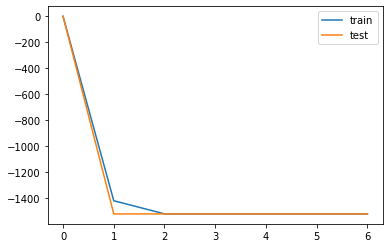

In [46]:
fig, ax = plt.subplots()

plt.plot([0]+history.history['loss'], label='train')
plt.plot([0]+history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [25]:
predictions = autoencoder_32.predict(Xvalid)
# TODO I should probably do something with the validation set

In [26]:
autoencoder_32.save(model_path + 'autoencoder_32')
encoder_32.save(model_path + 'encoder_32')

5 wide encoder

In [27]:
import keras
from keras import layers

In [28]:
X = Train.to_numpy()[:,3:]
Xtest = Test.to_numpy()[:,3:]
Xvalid = Valid.to_numpy()[:,3:]

In [29]:
input_dim = X.shape[1]
encoding_dim = 5

input_layer = keras.Input(shape=(input_dim,))
encoded_layer = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded_layer = layers.Dense(input_dim, activation='relu')(encoded_layer)

autoencoder_5 = keras.Model(input_layer,decoded_layer)

encoder_5 = keras.Model(input_layer, encoded_layer)

In [30]:
autoencoder_5.compile(optimizer='adam',
                    loss='binary_crossentropy')

In [31]:
autoencoder_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 136)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 685       
_________________________________________________________________
dense_4 (Dense)              (None, 136)               816       
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = autoencoder_5.fit(X, X, epochs=6, batch_size=64, verbose=1, validation_data=(Xtest, Xtest))

Train on 169807 samples, validate on 41820 samples
Epoch 1/6


 85952/169807 [==============>...............] - ETA: 29:26 - loss: 468.87 - ETA: 6:20 - loss: 364.7703 - ETA: 3:47 - loss: 319.723 - ETA: 2:49 - loss: 256.621 - ETA: 2:17 - loss: 181.827 - ETA: 1:58 - loss: 91.817 - ETA: 1:44 - loss: 6.7163 - ETA: 1:34 - loss: -76.570 - ETA: 1:30 - loss: -136.68 - ETA: 1:24 - loss: -204.44 - ETA: 1:19 - loss: -268.68 - ETA: 1:14 - loss: -325.72 - ETA: 1:11 - loss: -377.20 - ETA: 1:07 - loss: -436.63 - ETA: 1:03 - loss: -488.84 - ETA: 1:00 - loss: -534.88 - ETA: 58s - loss: -575.2454 - ETA: 57s - loss: -603.346 - ETA: 56s - loss: -628.771 - ETA: 54s - loss: -658.234 - ETA: 53s - loss: -680.329 - ETA: 51s - loss: -704.894 - ETA: 50s - loss: -727.832 - ETA: 49s - loss: -744.615 - ETA: 48s - loss: -763.357 - ETA: 46s - loss: -783.784 - ETA: 46s - loss: -796.648 - ETA: 45s - loss: -811.099 - ETA: 45s - loss: -820.943 - ETA: 44s - loss: -835.572 - ETA: 43s - loss: -846.885 - ETA: 42s - loss: -857.671 - ETA: 42s - loss: -865.457 - ETA: 41s - loss: -872.574 -

169807/169807 [==============================] - ETA: 16s - loss: -1319.89 - ETA: 15s - loss: -1320.61 - ETA: 15s - loss: -1321.12 - ETA: 15s - loss: -1321.89 - ETA: 15s - loss: -1322.41 - ETA: 15s - loss: -1322.97 - ETA: 15s - loss: -1323.68 - ETA: 15s - loss: -1324.28 - ETA: 15s - loss: -1324.91 - ETA: 15s - loss: -1325.35 - ETA: 15s - loss: -1325.95 - ETA: 15s - loss: -1326.74 - ETA: 15s - loss: -1327.29 - ETA: 15s - loss: -1328.01 - ETA: 15s - loss: -1328.73 - ETA: 15s - loss: -1329.44 - ETA: 15s - loss: -1329.86 - ETA: 15s - loss: -1330.53 - ETA: 15s - loss: -1331.19 - ETA: 15s - loss: -1331.84 - ETA: 14s - loss: -1332.49 - ETA: 14s - loss: -1333.19 - ETA: 14s - loss: -1333.67 - ETA: 14s - loss: -1334.32 - ETA: 14s - loss: -1334.96 - ETA: 14s - loss: -1335.56 - ETA: 14s - loss: -1336.15 - ETA: 14s - loss: -1336.57 - ETA: 14s - loss: -1337.17 - ETA: 14s - loss: -1337.72 - ETA: 14s - loss: -1338.29 - ETA: 14s - loss: -1339.00 - ETA: 14s - loss: -1339.62 - ETA: 14s - loss: -1340.44 -

 85568/169807 [==============>...............] - ETA: 49s - loss: -1552.59 - ETA: 47s - loss: -1528.48 - ETA: 38s - loss: -1522.41 - ETA: 36s - loss: -1520.86 - ETA: 36s - loss: -1517.95 - ETA: 34s - loss: -1516.27 - ETA: 33s - loss: -1514.87 - ETA: 33s - loss: -1514.47 - ETA: 33s - loss: -1516.28 - ETA: 32s - loss: -1516.87 - ETA: 32s - loss: -1520.53 - ETA: 32s - loss: -1521.45 - ETA: 31s - loss: -1521.96 - ETA: 32s - loss: -1519.93 - ETA: 31s - loss: -1516.93 - ETA: 31s - loss: -1517.41 - ETA: 31s - loss: -1518.78 - ETA: 30s - loss: -1519.31 - ETA: 30s - loss: -1519.45 - ETA: 30s - loss: -1519.65 - ETA: 30s - loss: -1520.20 - ETA: 30s - loss: -1519.58 - ETA: 30s - loss: -1519.42 - ETA: 30s - loss: -1519.28 - ETA: 30s - loss: -1518.98 - ETA: 29s - loss: -1518.97 - ETA: 29s - loss: -1518.28 - ETA: 29s - loss: -1518.08 - ETA: 29s - loss: -1517.76 - ETA: 29s - loss: -1517.94 - ETA: 29s - loss: -1517.93 - ETA: 29s - loss: -1517.80 - ETA: 28s - loss: -1517.29 - ETA: 28s - loss: -1516.77 -

167232/169807 [============================>.] - ETA: 15s - loss: -1518.53 - ETA: 15s - loss: -1518.58 - ETA: 15s - loss: -1518.58 - ETA: 15s - loss: -1518.49 - ETA: 15s - loss: -1518.46 - ETA: 15s - loss: -1518.42 - ETA: 15s - loss: -1518.40 - ETA: 15s - loss: -1518.42 - ETA: 15s - loss: -1518.40 - ETA: 15s - loss: -1518.49 - ETA: 15s - loss: -1518.43 - ETA: 15s - loss: -1518.38 - ETA: 15s - loss: -1518.41 - ETA: 15s - loss: -1518.48 - ETA: 15s - loss: -1518.45 - ETA: 14s - loss: -1518.33 - ETA: 14s - loss: -1518.36 - ETA: 14s - loss: -1518.37 - ETA: 14s - loss: -1518.32 - ETA: 14s - loss: -1518.30 - ETA: 14s - loss: -1518.34 - ETA: 14s - loss: -1518.35 - ETA: 14s - loss: -1518.39 - ETA: 14s - loss: -1518.38 - ETA: 14s - loss: -1518.36 - ETA: 14s - loss: -1518.38 - ETA: 14s - loss: -1518.36 - ETA: 14s - loss: -1518.33 - ETA: 14s - loss: -1518.32 - ETA: 14s - loss: -1518.45 - ETA: 14s - loss: -1518.36 - ETA: 14s - loss: -1518.35 - ETA: 14s - loss: -1518.30 - ETA: 14s - loss: -1518.26 -

169807/169807 [==============================] - ETA: 0s - loss: -1519.177 - ETA: 0s - loss: -1519.169 - ETA: 0s - loss: -1519.155 - ETA: 0s - loss: -1519.163 - ETA: 0s - loss: -1519.154 - ETA: 0s - loss: -1519.157 - ETA: 0s - loss: -1519.125 - ETA: 0s - loss: -1519.067 - 34s 199us/step - loss: -1519.0819 - val_loss: -1519.4886
Epoch 3/6


 91392/169807 [===============>..............] - ETA: 1:14 - loss: -1541.335 - ETA: 38s - loss: -1532.885 - ETA: 33s - loss: -1519.00 - ETA: 33s - loss: -1524.00 - ETA: 34s - loss: -1512.33 - ETA: 33s - loss: -1516.27 - ETA: 33s - loss: -1515.17 - ETA: 33s - loss: -1516.52 - ETA: 34s - loss: -1516.98 - ETA: 34s - loss: -1520.22 - ETA: 34s - loss: -1522.23 - ETA: 34s - loss: -1521.20 - ETA: 34s - loss: -1520.62 - ETA: 34s - loss: -1521.44 - ETA: 34s - loss: -1520.90 - ETA: 34s - loss: -1521.12 - ETA: 34s - loss: -1520.83 - ETA: 34s - loss: -1521.56 - ETA: 34s - loss: -1521.46 - ETA: 34s - loss: -1520.87 - ETA: 34s - loss: -1521.22 - ETA: 34s - loss: -1521.39 - ETA: 34s - loss: -1521.86 - ETA: 35s - loss: -1522.53 - ETA: 35s - loss: -1522.51 - ETA: 35s - loss: -1522.15 - ETA: 35s - loss: -1522.28 - ETA: 35s - loss: -1522.16 - ETA: 35s - loss: -1522.50 - ETA: 34s - loss: -1522.26 - ETA: 34s - loss: -1522.21 - ETA: 34s - loss: -1521.12 - ETA: 33s - loss: -1521.31 - ETA: 33s - loss: -1522.0

169807/169807 [==============================] - ETA: 13s - loss: -1520.03 - ETA: 13s - loss: -1520.09 - ETA: 13s - loss: -1520.20 - ETA: 13s - loss: -1520.29 - ETA: 13s - loss: -1520.26 - ETA: 13s - loss: -1520.25 - ETA: 13s - loss: -1520.31 - ETA: 13s - loss: -1520.37 - ETA: 13s - loss: -1520.39 - ETA: 13s - loss: -1520.43 - ETA: 12s - loss: -1520.37 - ETA: 12s - loss: -1520.37 - ETA: 12s - loss: -1520.37 - ETA: 12s - loss: -1520.31 - ETA: 12s - loss: -1520.26 - ETA: 12s - loss: -1520.25 - ETA: 12s - loss: -1520.33 - ETA: 12s - loss: -1520.32 - ETA: 12s - loss: -1520.31 - ETA: 12s - loss: -1520.29 - ETA: 12s - loss: -1520.24 - ETA: 12s - loss: -1520.27 - ETA: 12s - loss: -1520.25 - ETA: 12s - loss: -1520.16 - ETA: 12s - loss: -1520.14 - ETA: 12s - loss: -1520.15 - ETA: 12s - loss: -1520.13 - ETA: 12s - loss: -1520.15 - ETA: 12s - loss: -1520.17 - ETA: 12s - loss: -1520.16 - ETA: 12s - loss: -1520.21 - ETA: 11s - loss: -1520.22 - ETA: 11s - loss: -1520.25 - ETA: 11s - loss: -1520.26 -

 94912/169807 [===============>..............] - ETA: 54s - loss: -1533.42 - ETA: 38s - loss: -1509.93 - ETA: 34s - loss: -1519.20 - ETA: 32s - loss: -1512.78 - ETA: 31s - loss: -1515.74 - ETA: 30s - loss: -1519.56 - ETA: 29s - loss: -1516.86 - ETA: 28s - loss: -1514.90 - ETA: 27s - loss: -1513.58 - ETA: 27s - loss: -1514.58 - ETA: 27s - loss: -1514.14 - ETA: 27s - loss: -1514.70 - ETA: 26s - loss: -1516.58 - ETA: 26s - loss: -1515.72 - ETA: 26s - loss: -1514.74 - ETA: 26s - loss: -1515.42 - ETA: 26s - loss: -1514.41 - ETA: 26s - loss: -1515.04 - ETA: 26s - loss: -1514.67 - ETA: 26s - loss: -1514.03 - ETA: 26s - loss: -1513.96 - ETA: 26s - loss: -1514.96 - ETA: 26s - loss: -1515.46 - ETA: 25s - loss: -1515.13 - ETA: 26s - loss: -1515.83 - ETA: 25s - loss: -1515.98 - ETA: 25s - loss: -1515.92 - ETA: 25s - loss: -1515.87 - ETA: 25s - loss: -1515.90 - ETA: 25s - loss: -1516.92 - ETA: 25s - loss: -1517.08 - ETA: 25s - loss: -1517.53 - ETA: 25s - loss: -1518.39 - ETA: 25s - loss: -1518.13 -

169807/169807 [==============================] - ETA: 12s - loss: -1520.45 - ETA: 12s - loss: -1520.37 - ETA: 12s - loss: -1520.26 - ETA: 12s - loss: -1520.18 - ETA: 12s - loss: -1520.22 - ETA: 12s - loss: -1520.17 - ETA: 12s - loss: -1520.23 - ETA: 12s - loss: -1520.21 - ETA: 12s - loss: -1520.21 - ETA: 11s - loss: -1520.19 - ETA: 11s - loss: -1520.16 - ETA: 11s - loss: -1520.16 - ETA: 11s - loss: -1520.17 - ETA: 11s - loss: -1520.18 - ETA: 11s - loss: -1520.12 - ETA: 11s - loss: -1520.11 - ETA: 11s - loss: -1520.10 - ETA: 11s - loss: -1520.06 - ETA: 11s - loss: -1520.05 - ETA: 11s - loss: -1519.94 - ETA: 11s - loss: -1519.93 - ETA: 11s - loss: -1519.91 - ETA: 11s - loss: -1519.89 - ETA: 11s - loss: -1519.90 - ETA: 11s - loss: -1519.94 - ETA: 11s - loss: -1519.96 - ETA: 11s - loss: -1519.97 - ETA: 11s - loss: -1519.95 - ETA: 11s - loss: -1519.93 - ETA: 10s - loss: -1519.96 - ETA: 10s - loss: -1519.87 - ETA: 10s - loss: -1519.89 - ETA: 10s - loss: -1519.92 - ETA: 10s - loss: -1519.92 -

 87168/169807 [==============>...............] - ETA: 1:27 - loss: -1496.813 - ETA: 37s - loss: -1501.048 - ETA: 34s - loss: -1512.27 - ETA: 32s - loss: -1517.22 - ETA: 30s - loss: -1521.04 - ETA: 30s - loss: -1519.64 - ETA: 29s - loss: -1517.42 - ETA: 29s - loss: -1517.62 - ETA: 28s - loss: -1517.87 - ETA: 28s - loss: -1516.77 - ETA: 28s - loss: -1518.77 - ETA: 29s - loss: -1519.78 - ETA: 29s - loss: -1519.35 - ETA: 28s - loss: -1519.96 - ETA: 28s - loss: -1518.76 - ETA: 28s - loss: -1518.62 - ETA: 28s - loss: -1518.88 - ETA: 27s - loss: -1518.23 - ETA: 27s - loss: -1518.84 - ETA: 27s - loss: -1519.20 - ETA: 27s - loss: -1520.06 - ETA: 26s - loss: -1519.88 - ETA: 26s - loss: -1519.84 - ETA: 26s - loss: -1520.63 - ETA: 26s - loss: -1520.47 - ETA: 26s - loss: -1519.86 - ETA: 26s - loss: -1520.55 - ETA: 27s - loss: -1520.04 - ETA: 27s - loss: -1520.36 - ETA: 27s - loss: -1519.58 - ETA: 27s - loss: -1519.87 - ETA: 27s - loss: -1520.40 - ETA: 27s - loss: -1520.46 - ETA: 27s - loss: -1521.1

169600/169807 [============================>.] - ETA: 15s - loss: -1518.78 - ETA: 15s - loss: -1518.83 - ETA: 15s - loss: -1518.71 - ETA: 15s - loss: -1518.65 - ETA: 14s - loss: -1518.60 - ETA: 14s - loss: -1518.60 - ETA: 14s - loss: -1518.57 - ETA: 14s - loss: -1518.58 - ETA: 14s - loss: -1518.64 - ETA: 14s - loss: -1518.68 - ETA: 14s - loss: -1518.79 - ETA: 14s - loss: -1518.83 - ETA: 14s - loss: -1518.78 - ETA: 14s - loss: -1518.81 - ETA: 14s - loss: -1518.81 - ETA: 14s - loss: -1518.84 - ETA: 14s - loss: -1518.76 - ETA: 14s - loss: -1518.78 - ETA: 14s - loss: -1518.81 - ETA: 13s - loss: -1518.84 - ETA: 13s - loss: -1518.80 - ETA: 13s - loss: -1518.82 - ETA: 13s - loss: -1518.82 - ETA: 13s - loss: -1518.85 - ETA: 13s - loss: -1518.88 - ETA: 13s - loss: -1518.88 - ETA: 13s - loss: -1518.82 - ETA: 13s - loss: -1518.82 - ETA: 13s - loss: -1518.82 - ETA: 13s - loss: -1518.90 - ETA: 13s - loss: -1518.96 - ETA: 13s - loss: -1518.95 - ETA: 13s - loss: -1519.01 - ETA: 13s - loss: -1519.11 -

169807/169807 [==============================] - 33s 196us/step - loss: -1519.0819 - val_loss: -1519.4886
Epoch 6/6


 89152/169807 [==============>...............] - ETA: 52s - loss: -1518.08 - ETA: 38s - loss: -1526.08 - ETA: 34s - loss: -1533.72 - ETA: 35s - loss: -1532.25 - ETA: 37s - loss: -1528.59 - ETA: 35s - loss: -1526.85 - ETA: 35s - loss: -1521.68 - ETA: 35s - loss: -1521.06 - ETA: 35s - loss: -1519.70 - ETA: 35s - loss: -1520.93 - ETA: 35s - loss: -1520.50 - ETA: 34s - loss: -1520.80 - ETA: 34s - loss: -1519.72 - ETA: 33s - loss: -1519.91 - ETA: 33s - loss: -1518.42 - ETA: 33s - loss: -1518.80 - ETA: 33s - loss: -1517.74 - ETA: 33s - loss: -1518.80 - ETA: 33s - loss: -1518.55 - ETA: 33s - loss: -1517.88 - ETA: 33s - loss: -1518.38 - ETA: 33s - loss: -1518.06 - ETA: 32s - loss: -1518.16 - ETA: 32s - loss: -1518.73 - ETA: 32s - loss: -1518.27 - ETA: 32s - loss: -1517.41 - ETA: 32s - loss: -1518.08 - ETA: 32s - loss: -1518.36 - ETA: 32s - loss: -1518.16 - ETA: 31s - loss: -1519.16 - ETA: 31s - loss: -1519.04 - ETA: 31s - loss: -1519.35 - ETA: 31s - loss: -1519.06 - ETA: 30s - loss: -1519.02 -

169807/169807 [==============================] - ETA: 14s - loss: -1519.75 - ETA: 14s - loss: -1519.84 - ETA: 14s - loss: -1519.83 - ETA: 14s - loss: -1519.79 - ETA: 14s - loss: -1519.82 - ETA: 14s - loss: -1519.80 - ETA: 14s - loss: -1519.78 - ETA: 13s - loss: -1519.79 - ETA: 13s - loss: -1519.70 - ETA: 13s - loss: -1519.68 - ETA: 13s - loss: -1519.68 - ETA: 13s - loss: -1519.66 - ETA: 13s - loss: -1519.71 - ETA: 13s - loss: -1519.61 - ETA: 13s - loss: -1519.51 - ETA: 13s - loss: -1519.48 - ETA: 13s - loss: -1519.50 - ETA: 13s - loss: -1519.52 - ETA: 13s - loss: -1519.57 - ETA: 13s - loss: -1519.53 - ETA: 13s - loss: -1519.44 - ETA: 13s - loss: -1519.47 - ETA: 12s - loss: -1519.47 - ETA: 12s - loss: -1519.50 - ETA: 12s - loss: -1519.49 - ETA: 12s - loss: -1519.55 - ETA: 12s - loss: -1519.53 - ETA: 12s - loss: -1519.55 - ETA: 12s - loss: -1519.57 - ETA: 12s - loss: -1519.56 - ETA: 12s - loss: -1519.67 - ETA: 12s - loss: -1519.70 - ETA: 12s - loss: -1519.70 - ETA: 12s - loss: -1519.69 -

{'val_loss': [-1519.4886301924544, -1519.4886301924544, -1519.4886301924544, -1519.4886305660793, -1519.4886307528918, -1519.488631126517], 'loss': [-1418.2337746746123, -1519.0818912214263, -1519.0818904069388, -1519.0818960062702, -1519.0818922070064, -1519.0818922522956]}


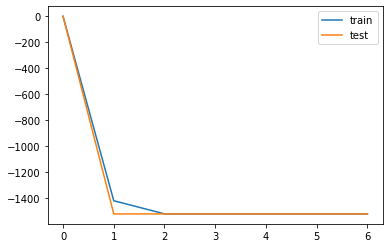

In [33]:
fig, ax = plt.subplots()

plt.plot([0]+history.history['loss'], label='train')
plt.plot([0]+history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [34]:
predictions = autoencoder_5.predict(Xvalid)
# TODO I should probably do something with the validation set

In [35]:
autoencoder_5.save(model_path + 'autoencoder_5')
encoder_5.save(model_path + 'encoder_5')

## K-means
Not sure what this is going to do 
(my guess is it is going to cluster similar participants)

In [36]:
import matplotlib.pyplot as plt

def visualize_labels(y):
    idx = np.arange(len(y))

    fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True)

    ax1.imshow(y[np.newaxis,:], cmap="plasma", aspect="auto")
    ax1.set_yticks([])

    ax2.scatter(idx,y)

    plt.tight_layout()
    plt.show()

In [37]:
from sklearn.cluster import KMeans

In [38]:
X_pca = face_pca_n_32.transform(X)
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X_pca)

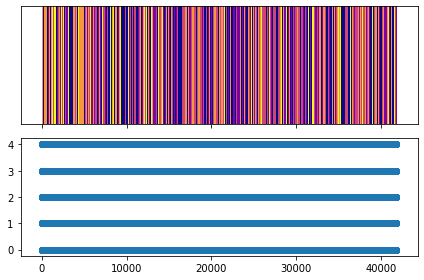

In [39]:
y = kmeans_5.predict(face_pca_n_32.transform(Test.to_numpy()[:,3:]))
visualize_labels(y)

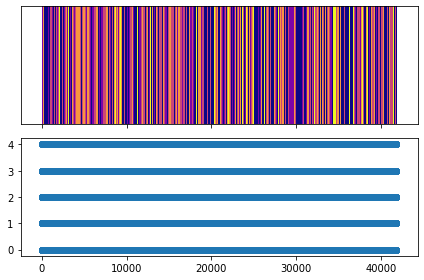

In [40]:
y = kmeans_5.predict(face_pca_n_32.transform(Valid.to_numpy()[:,3:]))
visualize_labels(y)

In [41]:
pickle.dump(kmeans_5,open(model_path+'kmeans_5_from_pca.p','wb'))

In [42]:
X_auto = encoder_32.predict(X)
kmeans_5 = KMeans(n_clusters=5, random_state=0).fit(X_auto)

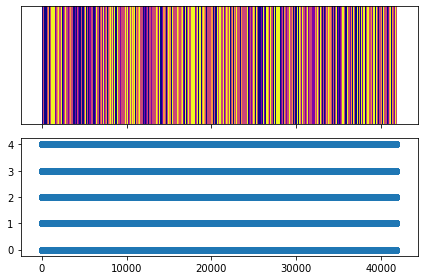

In [43]:
y = kmeans_5.predict(encoder_32.predict(Test.to_numpy()[:,3:]))
visualize_labels(y)

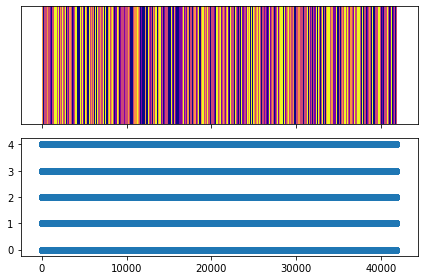

In [44]:
y = kmeans_5.predict(encoder_32.predict(Valid.to_numpy()[:,3:]))
visualize_labels(y)

In [45]:
pickle.dump(kmeans_5,open(model_path+'kmeans_5_from_auto.p','wb'))

## Model Comparisons
Is there some way to perform a comparison across the models
- PCA-n-5
- PCA-n-32 -> KMeans-5-from-pca
- Autoencoder-32 -> KMeans-5-from-autoencoder
- Autoencoder-5